In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2071 non-null   int64  
 1   Glucose                   2071 non-null   int64  
 2   BloodPressure             2071 non-null   int64  
 3   SkinThickness             2071 non-null   int64  
 4   Insulin                   2071 non-null   int64  
 5   BMI                       2071 non-null   float64
 6   DiabetesPedigreeFunction  2071 non-null   float64
 7   Age                       2071 non-null   int64  
 8   Outcome                   2071 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 145.7 KB


Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).


In [8]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [9]:
X

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
2066,1,0,36.8,38,173,74,0.088
2067,1,120,23.1,26,109,38,0.407
2068,1,0,27.1,24,108,88,0.400
2069,6,0,23.7,28,96,0,0.190


In [10]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2066    1
2067    0
2068    0
2069    0
2070    0
Name: Outcome, Length: 2071, dtype: int64

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.


In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9453376205787781


Well, you got a classification rate of 93.8%, considered as good accuracy. You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook.

For plotting tree, you also need to install graphviz and pydotplus.

#pip install graphviz

#pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

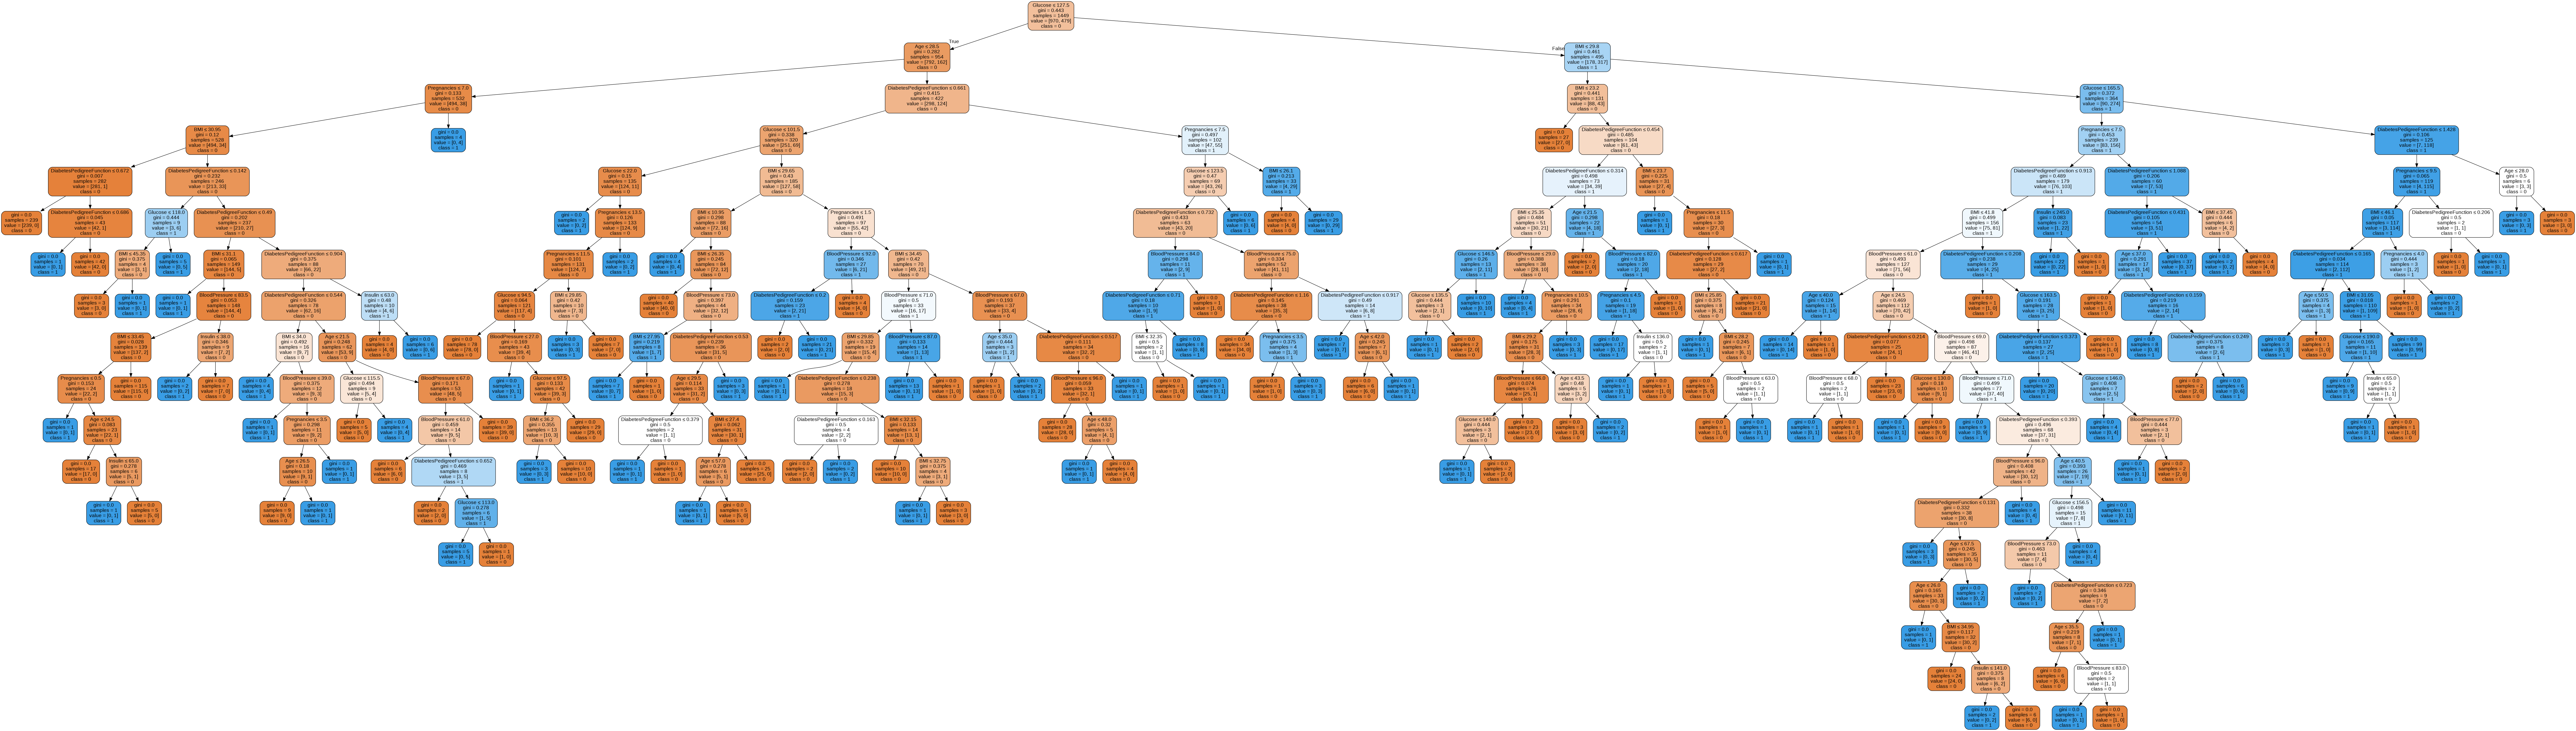

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('content/diabetes.png')
Image(graph.create_png())